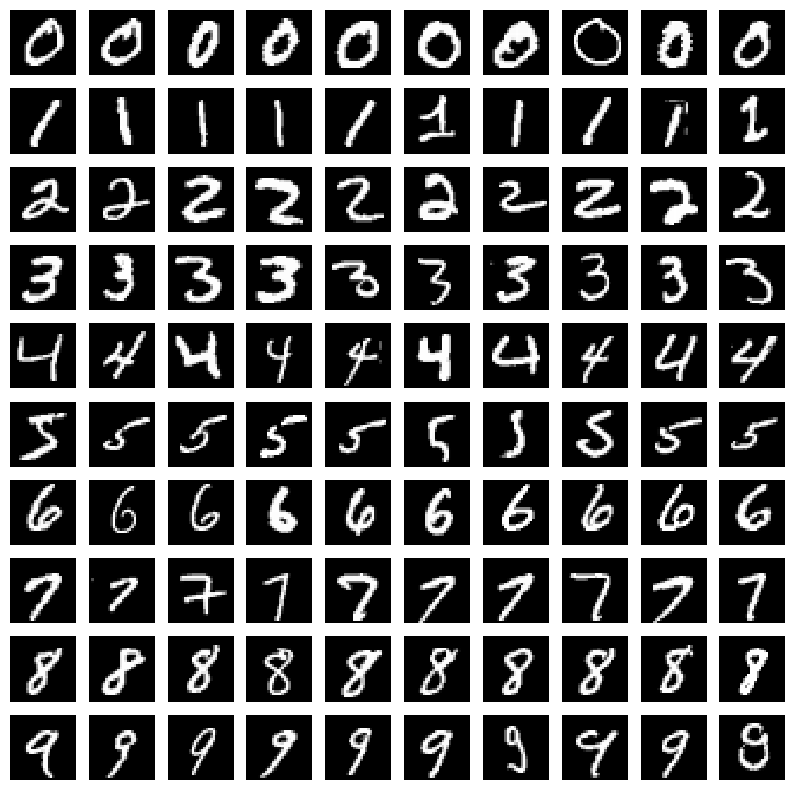

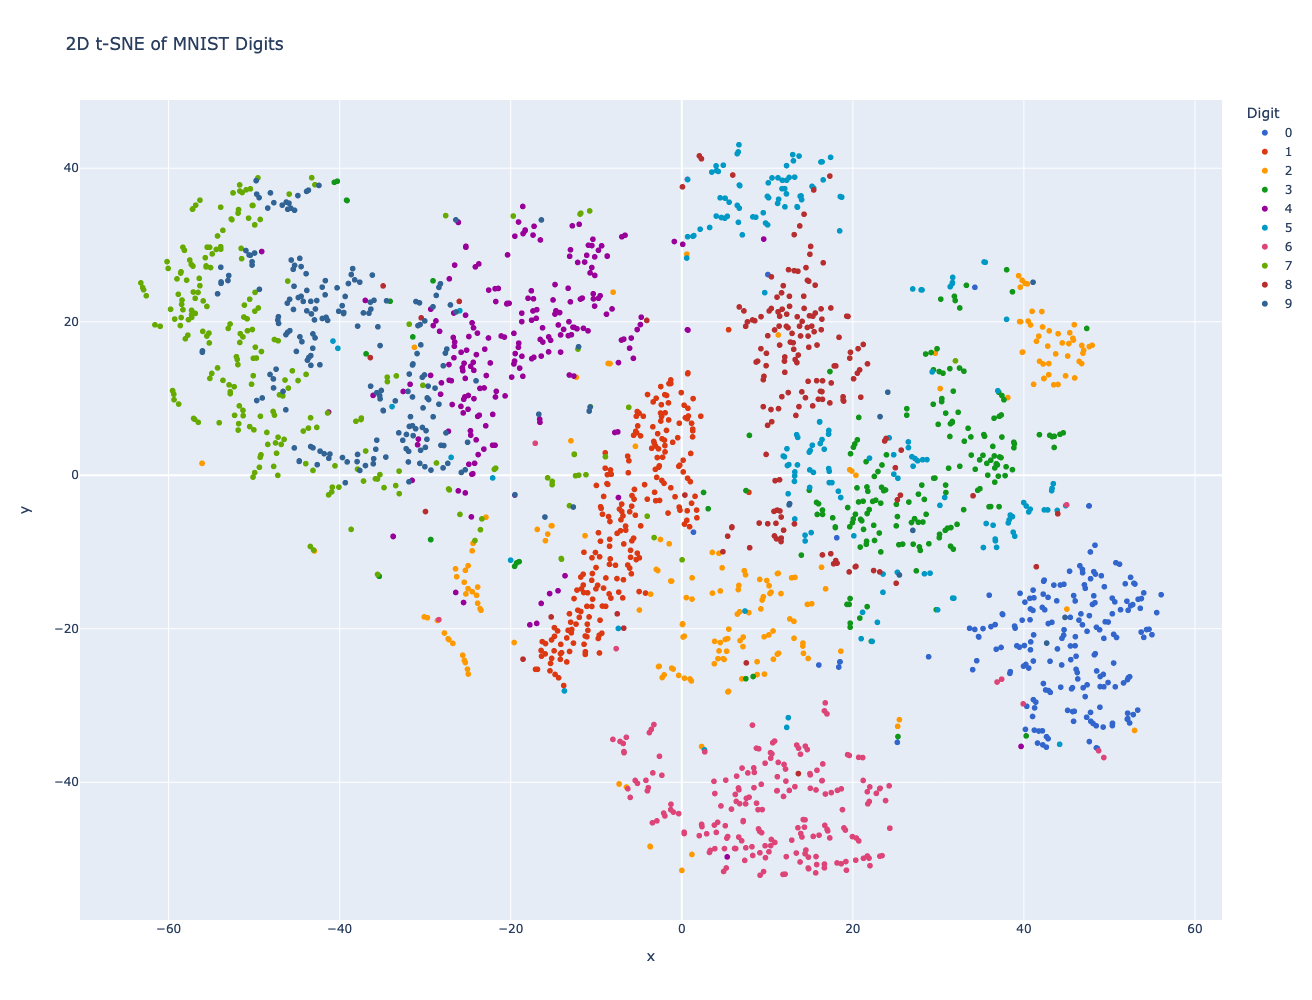

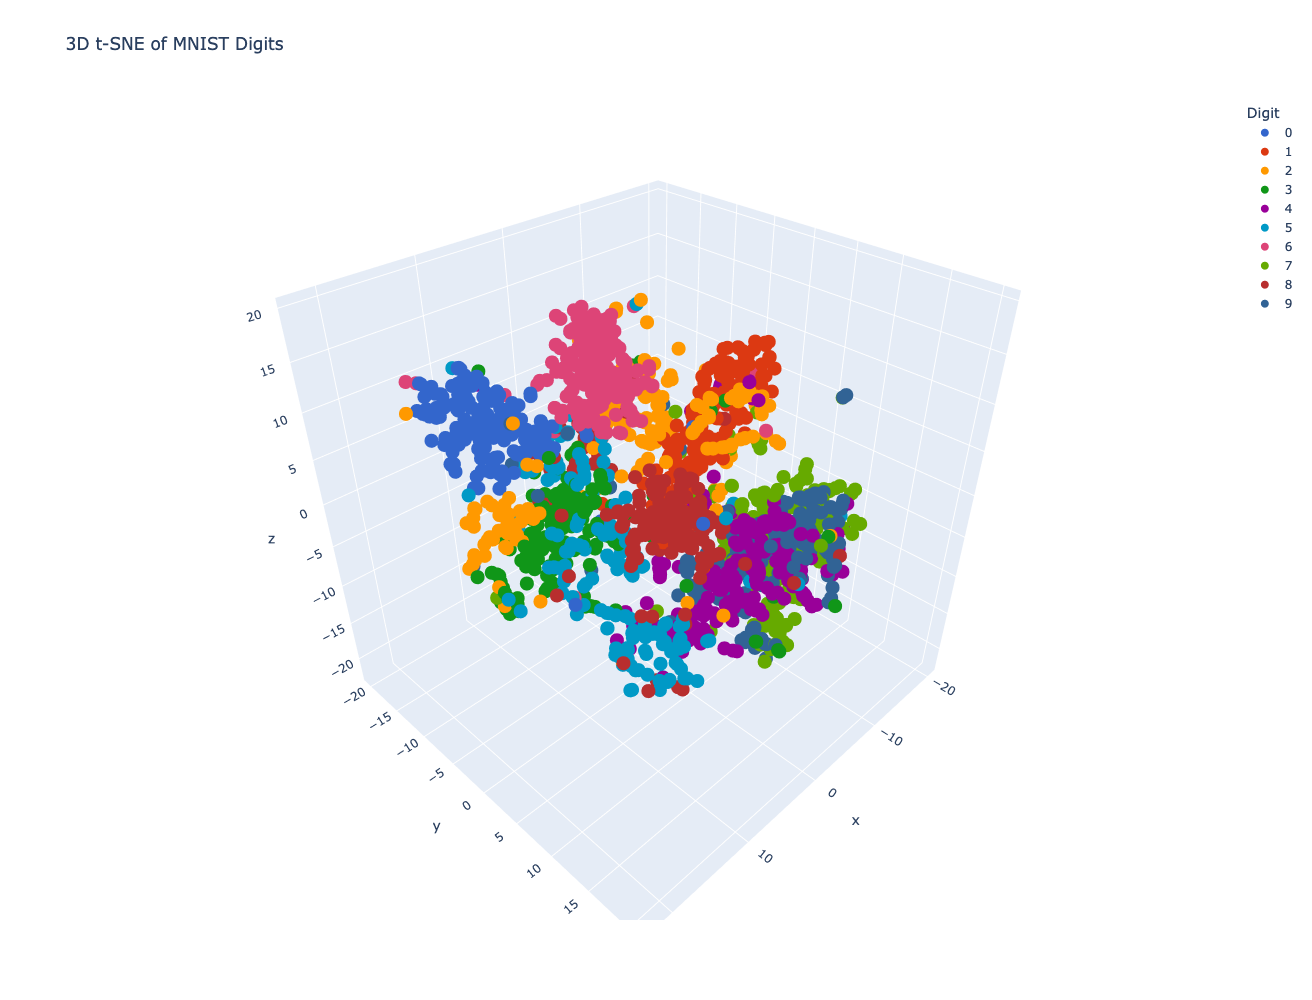

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist.data, mnist.target.astype(int)  # Use int directly or np.int64 as needed

n = 2000  # Number of samples to use for t-SNE visualization
x_train = x.iloc[:n].to_numpy()  # Convert to numpy array if it's a DataFrame
y_train = y[:n]

# Data standardization
X_standardized = StandardScaler().fit_transform(x_train) 


# Apply t-SNE for 2D visualization
tsne_2d = TSNE(n_components=2, random_state=0)
X_2d = tsne_2d.fit_transform(X_standardized)

# Apply t-SNE for 3D visualization
tsne_3d = TSNE(n_components=3, random_state=0)
X_3d = tsne_3d.fit_transform(X_standardized)

# Display a 10x10 grid of sample digits for each number 0-9
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    idxs = np.where(y_train == i)[0][:10]
    for j, idx in enumerate(idxs):
        image_data = x_train[idx].reshape(28, 28)  # Reshape from (784,) to (28, 28)
        axes[i, j].imshow(image_data, cmap='gray', interpolation='none')
        axes[i, j].axis('off')
plt.show()


# Correcting legend order in the 2D t-SNE Plotly plot
fig_2d = px.scatter(x=X_2d[:, 0], y=X_2d[:, 1], color=y_train.astype(str),
                    category_orders={'color': [str(i) for i in range(10)]},
                    color_discrete_sequence=px.colors.qualitative.G10,
                    title='2D t-SNE of MNIST Digits',
                    labels={'color': 'Digit Label'})
fig_2d.update_layout(width=1000, height=1000, legend_title_text='Digit')
fig_2d.show()

# Correcting legend order in the 3D t-SNE Plotly plot
fig_3d = px.scatter_3d(x=X_3d[:, 0], y=X_3d[:, 1], z=X_3d[:, 2], color=y_train.astype(str),
                       category_orders={'color': [str(i) for i in range(10)]},
                       color_discrete_sequence=px.colors.qualitative.G10,
                       title='3D t-SNE of MNIST Digits',
                       labels={'color': 'Digit Label'})
fig_3d.update_layout(width=1000, height=1000, legend_title_text='Digit')
fig_3d.show()




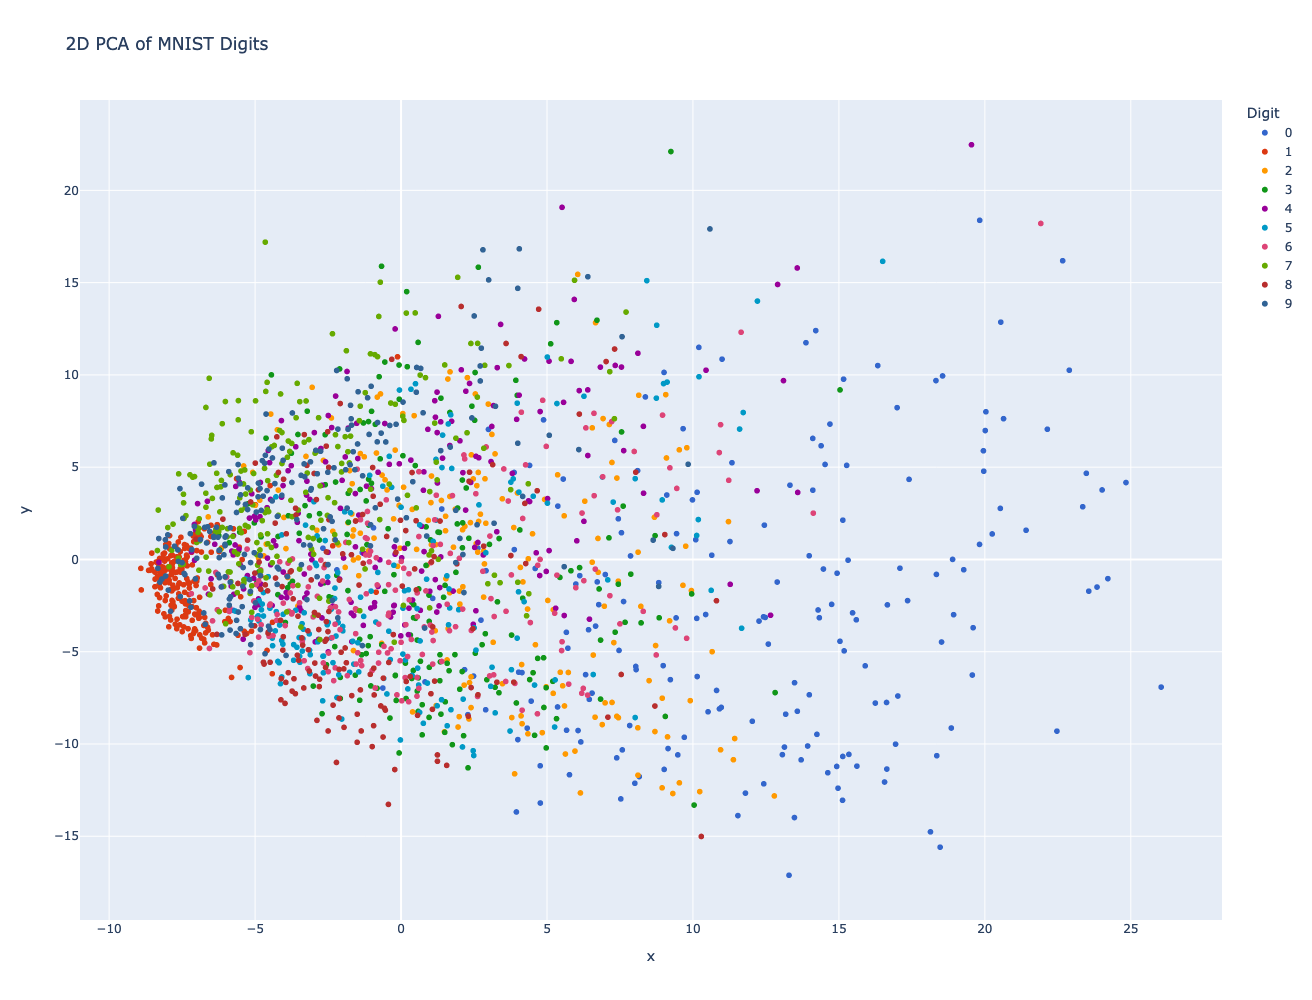

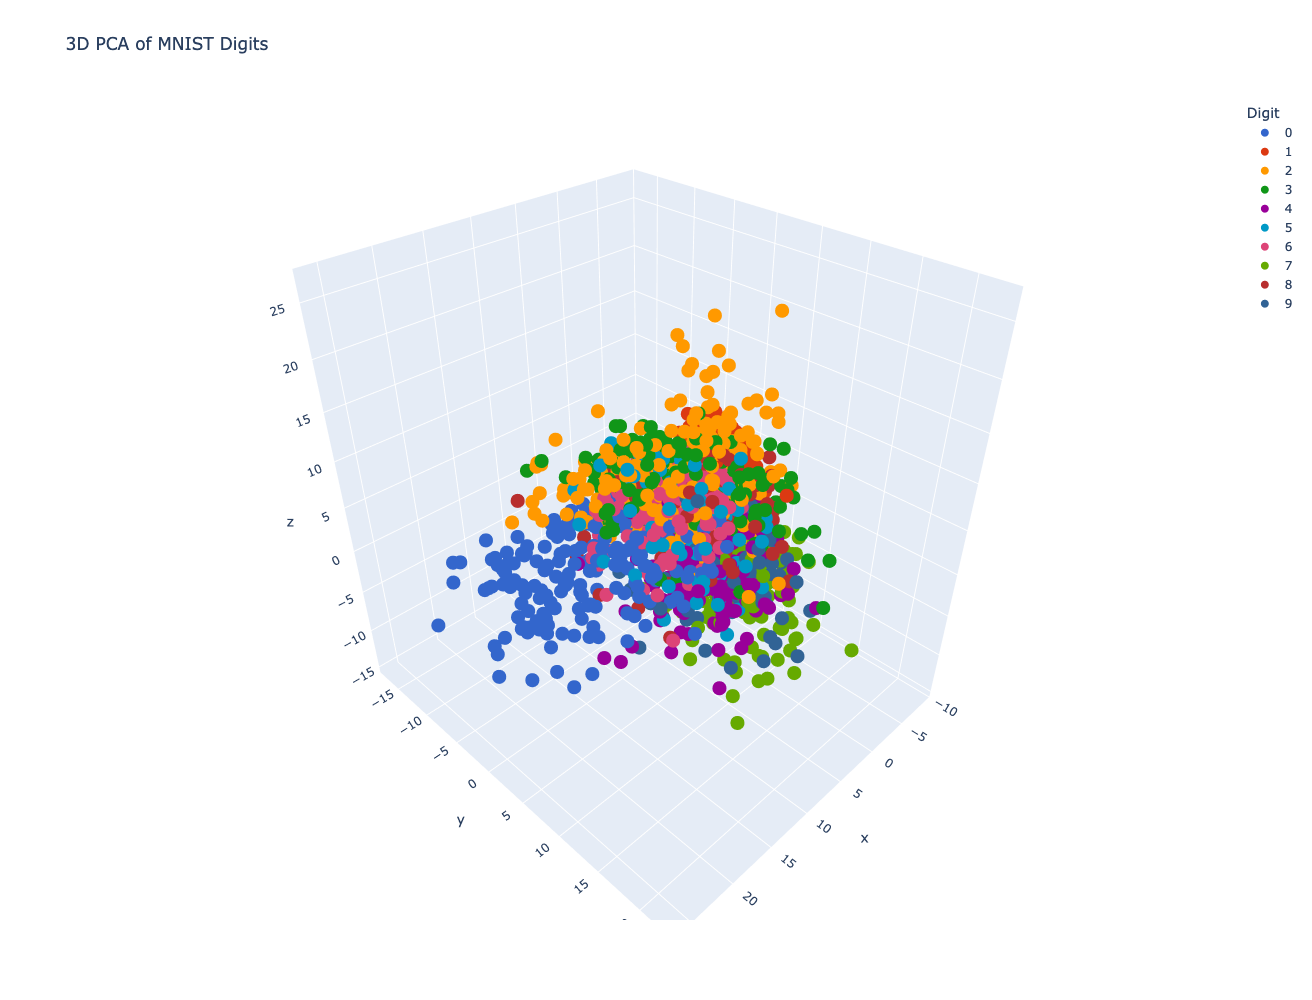

In [2]:
# Principal Component Analysis

from sklearn.decomposition import PCA

# Apply PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_standardized)

# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_standardized)

# Visualizing 2D PCA with Plotly
fig_pca_2d = px.scatter(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], color=y_train.astype(str),
                        category_orders={'color': [str(i) for i in range(10)]},
                        color_discrete_sequence=px.colors.qualitative.G10,
                        title='2D PCA of MNIST Digits',
                        labels={'color': 'Digit Label'})
fig_pca_2d.update_layout(width=1000, height=1000, legend_title_text='Digit')
fig_pca_2d.show()

# Visualizing 3D PCA with Plotly
fig_pca_3d = px.scatter_3d(x=X_pca_3d[:, 0], y=X_pca_3d[:, 1], z=X_pca_3d[:, 2], color=y_train.astype(str),
                           category_orders={'color': [str(i) for i in range(10)]},
                           color_discrete_sequence=px.colors.qualitative.G10,
                           title='3D PCA of MNIST Digits',
                           labels={'color': 'Digit Label'})
fig_pca_3d.update_layout(width=1000, height=1000, legend_title_text='Digit')
fig_pca_3d.show()



/Users/egor/opt/anaconda3/envs/mittel_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/egor/opt/anaconda3/envs/mittel_env/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



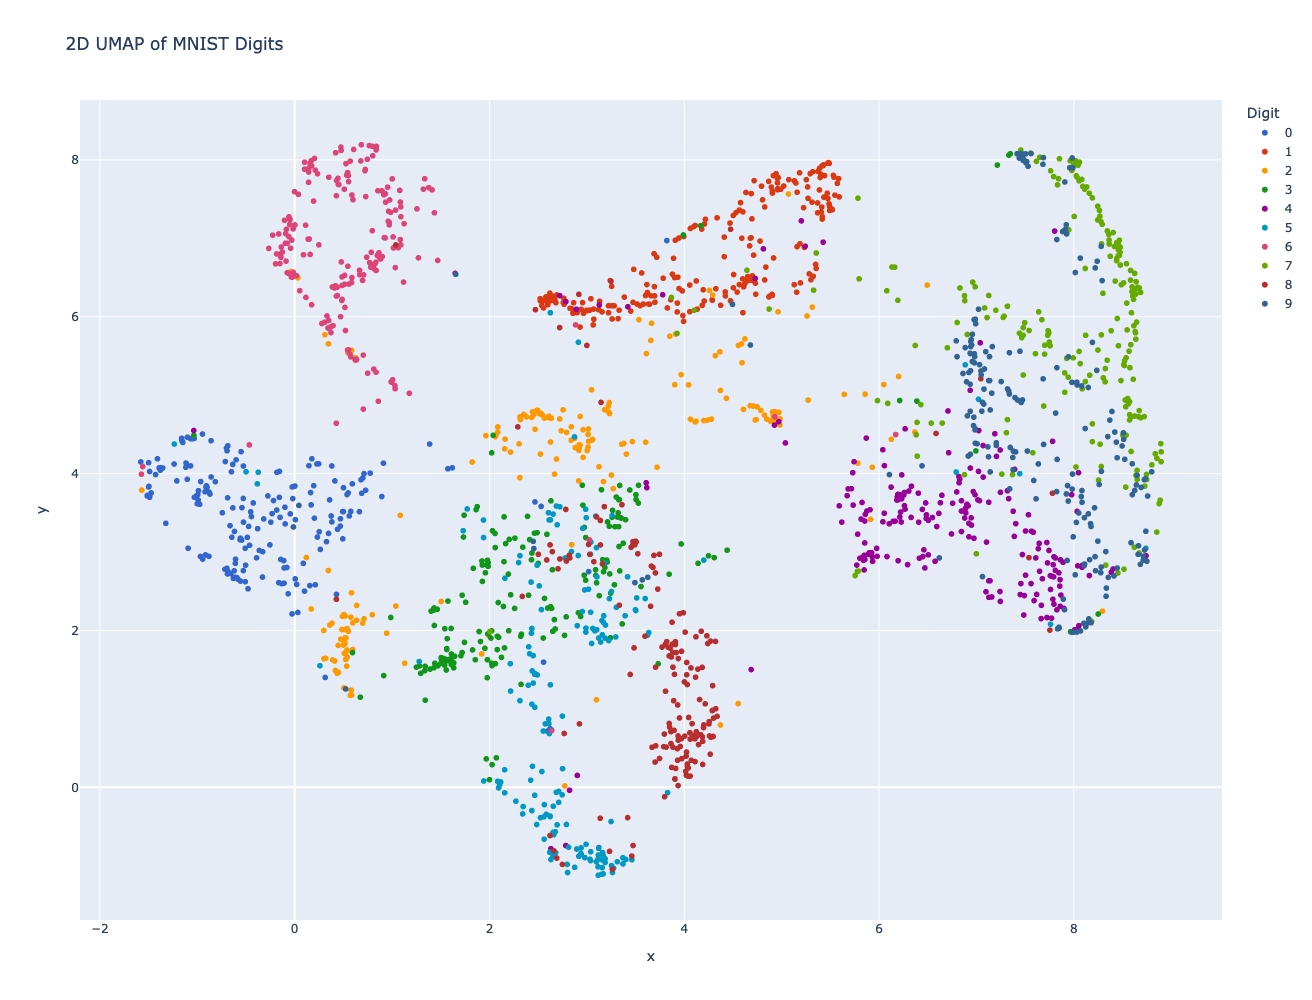

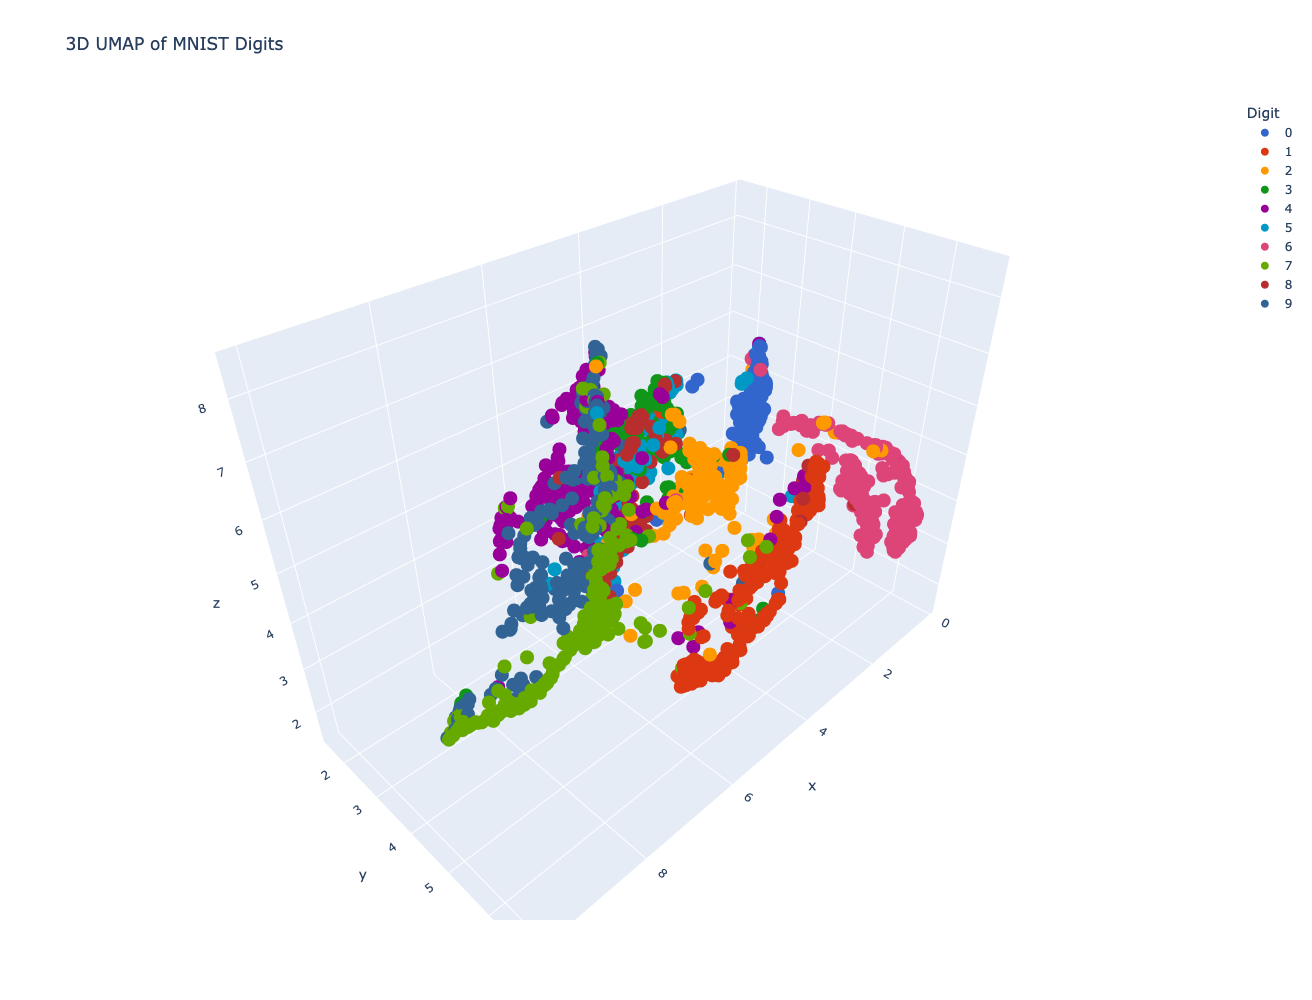

In [3]:
# Uniform Manifold Approximation and Projection

import umap

# Apply UMAP for 2D visualization
umap_2d = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Apply UMAP for 3D visualization
umap_3d = umap.UMAP(n_components=3, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap_3d = umap_3d.fit_transform(X_standardized)

# Visualizing 2D UMAP with Plotly
fig_umap_2d = px.scatter(x=X_umap_2d[:, 0], y=X_umap_2d[:, 1], color=y_train.astype(str),
                         category_orders={'color': [str(i) for i in range(10)]},
                         color_discrete_sequence=px.colors.qualitative.G10,
                         title='2D UMAP of MNIST Digits',
                         labels={'color': 'Digit Label'})
fig_umap_2d.update_layout(width=1000, height=1000, legend_title_text='Digit')
fig_umap_2d.show()

# Visualizing 3D UMAP with Plotly
fig_umap_3d = px.scatter_3d(x=X_umap_3d[:, 0], y=X_umap_3d[:, 1], z=X_umap_3d[:, 2], color=y_train.astype(str),
                            category_orders={'color': [str(i) for i in range(10)]},
                            color_discrete_sequence=px.colors.qualitative.G10,
                            title='3D UMAP of MNIST Digits',
                            labels={'color': 'Digit Label'})
fig_umap_3d.update_layout(width=1000, height=1000, legend_title_text='Digit')
fig_umap_3d.show()

